In [5]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

ground, sr = librosa.load('./GT/31.wav')
synthesized, sr = librosa.load('./baseline/31.wav')

In [6]:
os.listdir()

['.DS_Store',
 'GT',
 'ground16.wav',
 'baseline',
 'README.md',
 '.ipynb_checkpoints',
 'Requirement.ipynb',
 '.git',
 'MCD-DTW.py',
 'change.py',
 'ground.wav']

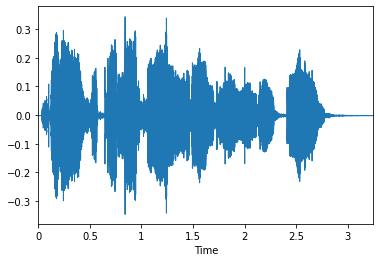

In [7]:
whale_song, _ = librosa.effects.trim(ground)
librosa.display.waveplot(whale_song, sr=sr);

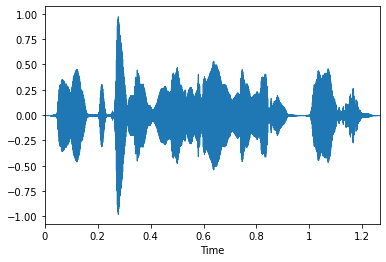

In [8]:
whale_song, _ = librosa.effects.trim(synthesized)
librosa.display.waveplot(synthesized, sr=sr);

In [9]:
import numpy as np
import librosa
from scipy.io import wavfile
import pysptk
from scipy.spatial.distance import euclidean
import os
from fastdtw import fastdtw

In [12]:
filename = './GT/30.wav'
sr, x = wavfile.read(filename)
assert sr == 22050
x = x.astype(np.float64)
frame_length = 1024
hop_length = 256  
# Windowing
frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T
frames *= pysptk.blackman(frame_length)
assert frames.shape[1] == frame_length 
# Order of mel-cepstrum
order = 25
alpha = 0.41
stage = 5
gamma = -1.0 / stage

mgc = pysptk.mgcep(frames, order, alpha, gamma)
mgc = mgc.reshape(-1, order + 1)
print("mgc of {} is ok!".format(filename))

mgc of ./GT/30.wav is ok!
